In [21]:
import math
import time
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np

In [22]:
@dataclass
class Genetic:
    best_fitness: int
    avg_fitness: float

    def __init__(self, best, avg):
        self.best_fitness = best
        self.avg_fitness = avg

In [23]:
class Evolution():
    def __init__(self, max = 256, size=10, base = 8):
        self.size = size
        self.base = base
        self.max = max
        self.generations = []
        self.first_gen = np.random.randint(0, max, size=size)
        self.generations.append(self.first_gen)
        self.target = np.random.randint(0, max)

    def mutation(self, x: int):
        start = np.random.randint(0, math.floor(self.base/2))
        end = np.random.randint(start, math.floor(self.base))
        x_string = str(bin(x))[2:]

        if len(x_string) != self.base:
            for i in range(self.base-len(x_string)):
                x_string = '0' + x_string

        x_string = list(x_string)
        for i in range(start, end):
            x_string[i] = '1' if x_string[i] == '0' else '0'

        return int(''.join(x_string), 2)

    def crossover(self, x, y):
        rand = np.random.randint(0, 2)
        x_string = str(bin(x if rand == 0 else y))[2:]
        y_string = str(bin(x if rand == 1 else y))[2:]
        n = 0
        if len(x_string) % 2 == 0:
            n = len(x_string) / 2
        else:
            if self.fitness(x if rand == 0 else y) > self.fitness(x if rand == 1 else y):
                n = math.ceil(len(x_string) / 2)
            else:
                n = math.floor(len(x_string) / 2)

        n = int(n)
        child = x_string[:n]+y_string[n:]
        return int(child, 2)

    def fitness(self, x: int):
        return -np.abs(x - self.target)

    def get_new_crossover(self, generation: zip):
        new_generation = []
        t = 0
        best = 0
        second = 0

        for i in range(len(generation)):
            if best > generation[i][0] > second != generation[i][1]:
                second = generation[i][1]

            if generation[i][0] > best != generation[i][1]:
                second = best
                best = generation[i][1]

        for i in generation:
            new_generation.append(self.crossover(i[1], best))
            new_generation.append(self.crossover(i[1], second))

        return new_generation

    def get_new_generation(self, old_generation):
        new_generation = self.get_new_crossover(old_generation)

        for i in np.random.randint(0, self.size, size=math.floor(self.size/2)):
            new_generation[i] = self.mutation(new_generation[i])

        return new_generation

    def train(self):
        i = 0
        train_fitness = []
        while True:

            fitnesses = [self.fitness(x) for x in self.generations[i]]
            train_fitness.append(fitnesses)
            # Pick 5 best numbers
            generation = sorted(zip(fitnesses, self.generations[i]), reverse=True)[:(math.floor(self.size/2))]
            if max(fitnesses) == 0:
                print(self.generations)
                return [Genetic(max(f), sum(f)/len(f)) for f in train_fitness], self.generations

            new_generation = self.get_new_generation(generation)
            #print(new_gen)
            #print(self.target)
            self.generations.append(new_generation)

            i += 1

    def train_time(self):
        i = 0
        train_time = []

        for t in range(20):
            print(i)
            start_time = time.time()
            while True:

                fitnesses = [self.fitness(x) for x in self.generations[i]]
                # Pick 5 best numbers
                generation = sorted(zip(fitnesses, self.generations[i]), reverse=True)[:(math.floor(self.size/2))]
                if max(fitnesses) == 0:
                    end_time = time.time()
                    train_time.append(end_time-start_time)
                    break
        
                new_generation = self.get_new_generation(generation)
                self.generations.append(new_generation)

                i += 1

        return sum(train_time)/len(train_time)

In [24]:
def print_genetics(genetic, best, average, i):
    print(f"Genetic {i}: ")
    print(genetic)
    print(f"Best Fitness: {best}")
    print(f"Average Fitness: {average}")
    print("")

In [25]:
def task1():
    evo = Evolution()

    genetic, genetics = evo.train()

    for i in range(len(genetics)):
        print_genetics(genetics[i], genetic[i].best_fitness, genetic[i].avg_fitness, i)

    print(f"Target: {evo.target}")

In [26]:
def task2():
    n = np.arange(8, 18)
    time  = []

    for i in range(8, 18):
        evo = Evolution(2**i, 20, i)
        time.append(evo.train_time())
        print(f"Done with: {2**i}")
        print(f"Target: {evo.target}")
    plt.xlabel("Bit length")
    plt.ylabel("Time (s)")
    plt.plot(n, time)
    plt.show()

In [27]:
task1()

[array([ 58, 136, 219, 134, 194,  55,  57, 111,  36, 176]), [104, 8, 56, 248, 13, 111, 176, 142, 194, 194], [147, 111, 8, 142, 104, 29, 11, 208, 250, 12], [13, 13, 142, 142, 147, 9, 152, 104, 13, 208], [138, 8, 142, 114, 147, 9, 141, 104, 9, 152], [8, 138, 78, 14, 8, 8, 8, 8, 9, 235], [146, 138, 78, 9, 50, 235, 3, 14, 2, 229], [8, 8, 73, 9, 9, 118, 122, 26, 229, 14], [15, 15, 20, 14, 73, 85, 118, 26, 14, 229], [118, 118, 107, 149, 233, 9, 26, 26, 14, 206], [14, 14, 118, 118, 147, 13, 9, 149, 206, 8], [118, 54, 118, 118, 249, 9, 229, 213, 12, 50], [14, 14, 118, 14, 10, 48, 54, 14, 254, 50], [118, 118, 182, 6, 50, 46, 48, 6, 14, 251], [118, 14, 78, 48, 246, 251, 24, 6, 6, 6], [182, 142, 201, 62, 48, 48, 6, 24, 3, 3], [150, 242, 182, 182, 7, 70, 12, 201, 6, 176], [17, 9, 176, 200, 182, 182, 182, 123, 8, 70], [15, 15, 203, 174, 247, 11, 119, 182, 170, 11], [119, 79, 182, 10, 142, 174, 182, 182, 12, 203], [119, 14, 8, 126, 79, 21, 174, 46, 11, 27]]
Genetic 0: 
[ 58 136 219 134 194  55  57 1

0
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
Done with: 256
Target: 40
0
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
Done with: 512
Target: 58
0
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
Done with: 1024
Target: 530
0
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
Done with: 2048
Target: 49
0
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
Done with: 4096
Target: 615
0
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
397
Done with: 8192
Target: 5692
0
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
5667
Done with: 16384
Target: 3253
0
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
9340
Done with: 32768
Target: 11920
0
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
19659
Done with: 65536
Target: 47726
0
18298
18298
18298
18298
18298
18298
18298
18298
18298
18298

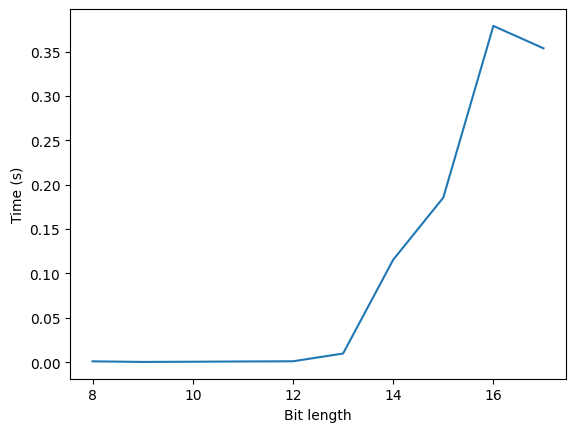

In [28]:
task2()